*let us say #feature 1 of 2nd row is missing and has to be imputed. So what we do is :*

1. You have to calculate the distance of row #2 with all the other rows
2. And whichever row is close to row #2, you will take the #feature 1 value of that row & fill it in the row #2, #feature1 value (here k=1)
3. let us say we have 2 close neighbours (k=2) then we take the mean of the closest 2 values of #feature1 .
let us say the distance between row#2 and row#1 is least, and second least is between row#2 and row#4 , so we take the #feature 1 values of row#1 and row#4 , take the mean. this is how knn works when the weight is uniform
4. When the weight is distance based, we multiply the value of the feature with (1/dist), so that the val that is more similar (least distance) gets more weightage.
5. lets say #feature1 value of row 1 = 70, row4 = 92.
uniform weight : mean -> (70+50)/2 -> equal weightage

distance-based weight :

dist btw row#2 and row#1 -> 10

dist btw row#2 and row#4 -> 50

closer (is row#2 and row#1)

so ((1/10)*70 + (1/50)*92)/2

6. works on small and medium datasets pretty well and more accurate

7. In production, entire X_train data has to be put on the server, since the new incoming data point with missing value, should be imputed by first

i) calculating the distance between that new row, and all the other rows

ii) then sort in ascending, to get closest neighbours

iii)  mean according to uniform or distance based
-> too many calculations, and since training data is large in large datasets speed reduces, memory increases, too many computations.

*euclidean distance concept for similarity*

here we use nan_euclidean_distance -> so that we can handle data have missing values

*to find the distance between 2 rows , we find out the sq of only those features in which both the values in both the rows are available*

weight = total no of coordinates/# of present coordinates

**nan_euclidean_distance**

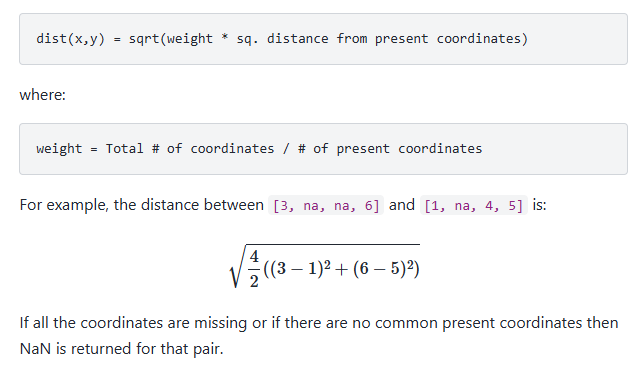

[nan_euclidean_distance_sklearn_doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html)

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [14]:
df = pd.read_csv('train.csv')[[
    'Age','Pclass','Fare','Survived'
]]

In [15]:
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [16]:
df.isnull().mean()*100

,0
Age,19.86532
Pclass,0.00000
Fare,0.00000
Survived,0.00000


**age has to be imputed, there are missing values in age**

In [17]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=2
)

In [19]:
X_train.head()

,Age,Pclass,Fare
30,40.0,1,27.7208
10,4.0,3,16.7000
873,47.0,3,9.0000
182,9.0,3,31.3875
876,20.0,3,9.8458


In [20]:
X_train.tail()

,Age,Pclass,Fare
534,30.0,3,8.6625
584,NaN,3,8.7125
493,71.0,1,49.5042
527,NaN,1,221.7792
168,NaN,1,25.9250


In [21]:
knn = KNNImputer(
    n_neighbors=3,weights='distance'
)
X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)


In [22]:
lr = LogisticRegression()
lr.fit(X_train_trf,y_train)
y_pred = lr.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.7039106145251397

**Compare with SimpleImputer mean**

In [23]:
si = SimpleImputer() #default strategy = mean
X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_trf2,y_train)
y_pred2 = lr.predict(X_test_trf2)
accuracy_score(y_test,y_pred2)


0.6927374301675978

*we can see an improve in accuracy, and knn imputer outperforms all the other imputers till date*